# Table of Contents
* [Data Preprocessing](#data-preprocessing)
    * [Data Loading](#data-loading)
    * [Filter Out High-value Customers](#filter-customers)
    * [Define Target Variable (Churn)](#define-churn)
    * [Filter Out Single Unique Values](#filter-single)
    * [Missing Values](#missing-values)
    * [Derive Features](#derive-features)
    * [Filter Out Highly Related Features](#filter-related)
    * [Prepare Train and Test Data](#train-test)
        * [Split Train and Test](#split)
        * [Feature Selection](#feature-selection)
        * [Resample](#resample)
        * [Scale](#scale)
* [Logistic Regression](#logistic-regression)

# Data Proprocessing <a class="anchor" id="data-preprocessing"></a> 

## Data Loading <a class="anchor" id="data-loading"></a> 

In [1]:
import numpy as np
import pandas as pd
import datetime as dt
import sklearn
import matplotlib.pyplot as plt
import matplotlib.ticker as mtick
import seaborn as sns

sns.set(style="ticks")
%matplotlib inline

pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)

# pd.set_option('display.max_colwidth', -1)

rdn_seed = 42

In [2]:
telecom = pd.read_csv('telecom_churn_data.csv')
telecom.head()

,mobile_number,circle_id,loc_og_t2o_mou,std_og_t2o_mou,loc_ic_t2o_mou,last_date_of_month_6,last_date_of_month_7,last_date_of_month_8,last_date_of_month_9,arpu_6,arpu_7,arpu_8,arpu_9,onnet_mou_6,onnet_mou_7,onnet_mou_8,onnet_mou_9,offnet_mou_6,offnet_mou_7,offnet_mou_8,offnet_mou_9,roam_ic_mou_6,roam_ic_mou_7,roam_ic_mou_8,roam_ic_mou_9,roam_og_mou_6,roam_og_mou_7,roam_og_mou_8,roam_og_mou_9,loc_og_t2t_mou_6,loc_og_t2t_mou_7,loc_og_t2t_mou_8,loc_og_t2t_mou_9,loc_og_t2m_mou_6,loc_og_t2m_mou_7,loc_og_t2m_mou_8,loc_og_t2m_mou_9,loc_og_t2f_mou_6,loc_og_t2f_mou_7,loc_og_t2f_mou_8,loc_og_t2f_mou_9,loc_og_t2c_mou_6,loc_og_t2c_mou_7,loc_og_t2c_mou_8,loc_og_t2c_mou_9,loc_og_mou_6,loc_og_mou_7,loc_og_mou_8,loc_og_mou_9,std_og_t2t_mou_6,std_og_t2t_mou_7,std_og_t2t_mou_8,std_og_t2t_mou_9,std_og_t2m_mou_6,std_og_t2m_mou_7,std_og_t2m_mou_8,std_og_t2m_mou_9,std_og_t2f_mou_6,std_og_t2f_mou_7,std_og_t2f_mou_8,std_og_t2f_mou_9,std_og_t2c_mou_6,std_og_t2c_mou_7,std_og_t2c_mou_8,std_og_t2c_mou_9,std_og_mou_6,std_og_mou_7,std_og_mou_8,std_og_mou_9,isd_og_mou_6,isd_og_mou_7,isd_og_mou_8,isd_og_mou_9,spl_og_mou_6,spl_og_mou_7,spl_og_mou_8,spl_og_mou_9,og_others_6,og_others_7,og_others_8,og_others_9,total_og_mou_6,total_og_mou_7,total_og_mou_8,total_og_mou_9,loc_ic_t2t_mou_6,loc_ic_t2t_mou_7,loc_ic_t2t_mou_8,loc_ic_t2t_mou_9,loc_ic_t2m_mou_6,loc_ic_t2m_mou_7,loc_ic_t2m_mou_8,loc_ic_t2m_mou_9,loc_ic_t2f_mou_6,loc_ic_t2f_mou_7,loc_ic_t2f_mou_8,loc_ic_t2f_mou_9,loc_ic_mou_6,loc_ic_mou_7,loc_ic_mou_8,loc_ic_mou_9,std_ic_t2t_mou_6,std_ic_t2t_mou_7,std_ic_t2t_mou_8,std_ic_t2t_mou_9,std_ic_t2m_mou_6,std_ic_t2m_mou_7,std_ic_t2m_mou_8,std_ic_t2m_mou_9,std_ic_t2f_mou_6,std_ic_t2f_mou_7,std_ic_t2f_mou_8,std_ic_t2f_mou_9,std_ic_t2o_mou_6,std_ic_t2o_mou_7,std_ic_t2o_mou_8,std_ic_t2o_mou_9,std_ic_mou_6,std_ic_mou_7,std_ic_mou_8,std_ic_mou_9,total_ic_mou_6,total_ic_mou_7,total_ic_mou_8,total_ic_mou_9,spl_ic_mou_6,spl_ic_mou_7,spl_ic_mou_8,spl_ic_mou_9,isd_ic_mou_6,isd_ic_mou_7,isd_ic_mou_8,isd_ic_mou_9,ic_others_6,ic_others_7,ic_others_8,ic_others_9,total_rech_num_6,total_rech_num_7,total_rech_num_8,total_rech_num_9,total_rech_amt_6,total_rech_amt_7,total_rech_amt_8,total_rech_amt_9,max_rech_amt_6,max_rech_amt_7,max_rech_amt_8,max_rech_amt_9,date_of_last_rech_6,date_of_last_rech_7,date_of_last_rech_8,date_of_last_rech_9,last_day_rech_amt_6,last_day_rech_amt_7,last_day_rech_amt_8,last_day_rech_amt_9,date_of_last_rech_data_6,date_of_last_rech_data_7,date_of_last_rech_data_8,date_of_last_rech_data_9,total_rech_data_6,total_rech_data_7,total_rech_data_8,total_rech_data_9,max_rech_data_6,max_rech_data_7,max_rech_data_8,max_rech_data_9,count_rech_2g_6,count_rech_2g_7,count_rech_2g_8,count_rech_2g_9,count_rech_3g_6,count_rech_3g_7,count_rech_3g_8,count_rech_3g_9,av_rech_amt_data_6,av_rech_amt_data_7,av_rech_amt_data_8,av_rech_amt_data_9,vol_2g_mb_6,vol_2g_mb_7,vol_2g_mb_8,vol_2g_mb_9,vol_3g_mb_6,vol_3g_mb_7,vol_3g_mb_8,vol_3g_mb_9,arpu_3g_6,arpu_3g_7,arpu_3g_8,arpu_3g_9,arpu_2g_6,arpu_2g_7,arpu_2g_8,arpu_2g_9,night_pck_user_6,night_pck_user_7,night_pck_user_8,night_pck_user_9,monthly_2g_6,monthly_2g_7,monthly_2g_8,monthly_2g_9,sachet_2g_6,sachet_2g_7,sachet_2g_8,sachet_2g_9,monthly_3g_6,monthly_3g_7,monthly_3g_8,monthly_3g_9,sachet_3g_6,sachet_3g_7,sachet_3g_8,sachet_3g_9,fb_user_6,fb_user_7,fb_user_8,fb_user_9,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,sep_vbc_3g
0,7000842753,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,9/30/2014,197.385,214.816,213.803,21.100,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.0,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.0,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.0,NaN,0.00,0.00,0.00,0.00,NaN,NaN,0.16,NaN,NaN,NaN,4.13,NaN,NaN,NaN,1.15,NaN,NaN,NaN,5.44,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.0,NaN,NaN,NaN,0.00,NaN,0.00,0.00,5.44,0.00,NaN,NaN,0.0,NaN,NaN,NaN,0.0,NaN,NaN,NaN,0.0,NaN,

In [3]:
telecom.shape

(99999, 226)

In [4]:
telecom.info(verbose=True, null_counts=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99999 entries, 0 to 99998
Data columns (total 226 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   mobile_number             99999 non-null  int64  
 1   circle_id                 99999 non-null  int64  
 2   loc_og_t2o_mou            98981 non-null  float64
 3   std_og_t2o_mou            98981 non-null  float64
 4   loc_ic_t2o_mou            98981 non-null  float64
 5   last_date_of_month_6      99999 non-null  object 
 6   last_date_of_month_7      99398 non-null  object 
 7   last_date_of_month_8      98899 non-null  object 
 8   last_date_of_month_9      98340 non-null  object 
 9   arpu_6                    99999 non-null  float64
 10  arpu_7                    99999 non-null  float64
 11  arpu_8                    99999 non-null  float64
 12  arpu_9                    99999 non-null  float64
 13  onnet_mou_6               96062 non-null  float64
 14  onnet

In [5]:
telecom.rename(
    columns={
        'jun_vbc_3g': 'vbc_3g_6',
        'jul_vbc_3g': 'vbc_3g_7',
        'aug_vbc_3g': 'vbc_3g_8',
        'sep_vbc_3g': 'vbc_3g_9',
    },
    inplace=True,)

In [6]:
telecom.describe()

,mobile_number,circle_id,loc_og_t2o_mou,std_og_t2o_mou,loc_ic_t2o_mou,arpu_6,arpu_7,arpu_8,arpu_9,onnet_mou_6,onnet_mou_7,onnet_mou_8,onnet_mou_9,offnet_mou_6,offnet_mou_7,offnet_mou_8,offnet_mou_9,roam_ic_mou_6,roam_ic_mou_7,roam_ic_mou_8,roam_ic_mou_9,roam_og_mou_6,roam_og_mou_7,roam_og_mou_8,roam_og_mou_9,loc_og_t2t_mou_6,loc_og_t2t_mou_7,loc_og_t2t_mou_8,loc_og_t2t_mou_9,loc_og_t2m_mou_6,loc_og_t2m_mou_7,loc_og_t2m_mou_8,loc_og_t2m_mou_9,loc_og_t2f_mou_6,loc_og_t2f_mou_7,loc_og_t2f_mou_8,loc_og_t2f_mou_9,loc_og_t2c_mou_6,loc_og_t2c_mou_7,loc_og_t2c_mou_8,loc_og_t2c_mou_9,loc_og_mou_6,loc_og_mou_7,loc_og_mou_8,loc_og_mou_9,std_og_t2t_mou_6,std_og_t2t_mou_7,std_og_t2t_mou_8,std_og_t2t_mou_9,std_og_t2m_mou_6,std_og_t2m_mou_7,std_og_t2m_mou_8,std_og_t2m_mou_9,std_og_t2f_mou_6,std_og_t2f_mou_7,std_og_t2f_mou_8,std_og_t2f_mou_9,std_og_t2c_mou_6,std_og_t2c_mou_7,std_og_t2c_mou_8,std_og_t2c_mou_9,std_og_mou_6,std_og_mou_7,std_og_mou_8,std_og_mou_9,isd_og_mou_6,isd_og_mou_7,isd_og_mou_8,isd_og_mou_9,spl_og_mou_6,spl_og_mou_7,spl_og_mou_8,spl_og_mou_9,og_others_6,og_others_7,og_others_8,og_others_9,total_og_mou_6,total_og_mou_7,total_og_mou_8,total_og_mou_9,loc_ic_t2t_mou_6,loc_ic_t2t_mou_7,loc_ic_t2t_mou_8,loc_ic_t2t_mou_9,loc_ic_t2m_mou_6,loc_ic_t2m_mou_7,loc_ic_t2m_mou_8,loc_ic_t2m_mou_9,loc_ic_t2f_mou_6,loc_ic_t2f_mou_7,loc_ic_t2f_mou_8,loc_ic_t2f_mou_9,loc_ic_mou_6,loc_ic_mou_7,loc_ic_mou_8,loc_ic_mou_9,std_ic_t2t_mou_6,std_ic_t2t_mou_7,std_ic_t2t_mou_8,std_ic_t2t_mou_9,std_ic_t2m_mou_6,std_ic_t2m_mou_7,std_ic_t2m_mou_8,std_ic_t2m_mou_9,std_ic_t2f_mou_6,std_ic_t2f_mou_7,std_ic_t2f_mou_8,std_ic_t2f_mou_9,std_ic_t2o_mou_6,std_ic_t2o_mou_7,std_ic_t2o_mou_8,std_ic_t2o_mou_9,std_ic_mou_6,std_ic_mou_7,std_ic_mou_8,std_ic_mou_9,total_ic_mou_6,total_ic_mou_7,total_ic_mou_8,total_ic_mou_9,spl_ic_mou_6,spl_ic_mou_7,spl_ic_mou_8,spl_ic_mou_9,isd_ic_mou_6,isd_ic_mou_7,isd_ic_mou_8,isd_ic_mou_9,ic_others_6,ic_others_7,ic_others_8,ic_others_9,total_rech_num_6,total_rech_num_7,total_rech_num_8,total_rech_num_9,total_rech_amt_6,total_rech_amt_7,total_rech_amt_8,total_rech_amt_9,max_rech_amt_6,max_rech_amt_7,max_rech_amt_8,max_rech_amt_9,last_day_rech_amt_6,last_day_rech_amt_7,last_day_rech_amt_8,last_day_rech_amt_9,total_rech_data_6,total_rech_data_7,total_rech_data_8,total_rech_data_9,max_rech_data_6,max_rech_data_7,max_rech_data_8,max_rech_data_9,count_rech_2g_6,count_rech_2g_7,count_rech_2g_8,count_rech_2g_9,count_rech_3g_6,count_rech_3g_7,count_rech_3g_8,count_rech_3g_9,av_rech_amt_data_6,av_rech_amt_data_7,av_rech_amt_data_8,av_rech_amt_data_9,vol_2g_mb_6,vol_2g_mb_7,vol_2g_mb_8,vol_2g_mb_9,vol_3g_mb_6,vol_3g_mb_7,vol_3g_mb_8,vol_3g_mb_9,arpu_3g_6,arpu_3g_7,arpu_3g_8,arpu_3g_9,arpu_2g_6,arpu_2g_7,arpu_2g_8,arpu_2g_9,night_pck_user_6,night_pck_user_7,night_pck_user_8,night_pck_user_9,monthly_2g_6,monthly_2g_7,monthly_2g_8,monthly_2g_9,sachet_2g_6,sachet_2g_7,sachet_2g_8,sachet_2g_9,monthly_3g_6,monthly_3g_7,monthly_3g_8,monthly_3g_9,sachet_3g_6,sachet_3g_7,sachet_3g_8,sachet_3g_9,fb_user_6,fb_user_7,fb_user_8,fb_user_9,aon,vbc_3g_8,vbc_3g_7,vbc_3g_6,vbc_3g_9
count,9.999900e+04,99999.0,98981.0,98981.0,98981.0,99999.000000,99999.000000,99999.000000,99999.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.0,96140.0,94621.0,92254.0,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621.000

## Filter Out High Value Customers <a class="anchor" id="filter-customers"></a>

Normally, the revenue of a business is majorly from high-value customers. Let's check whether this telecom business satisfies this rule.

We have two kinds of recharge data:
1. recharge for Internet data usage = `total_rech_data` * `av_rech_amt_data`
2. recharge for calling = `total_rech_amt`

Calculate total charge amount as `total_amt`. Note `_6`, `_7` and `_8` means June, July, and August.

In [7]:
telecom['total_data_rech_amt_6'] = telecom['total_rech_data_6'] * telecom['av_rech_amt_data_6']
telecom['total_data_rech_amt_7'] = telecom['total_rech_data_7'] * telecom['av_rech_amt_data_7']
telecom['total_data_rech_amt_8'] = telecom['total_rech_data_8'] * telecom['av_rech_amt_data_8']

In [8]:
telecom['total_amt_6'] = telecom[['total_rech_amt_6','total_data_rech_amt_6']].sum(axis=1)
telecom['total_amt_7'] = telecom[['total_rech_amt_7','total_data_rech_amt_7']].sum(axis=1)
telecom['total_amt_8'] = telecom[['total_rech_amt_8','total_data_rech_amt_8']].sum(axis=1)

High-value Customers Analysis: To see accumulative percentage of revenue from customers.

Text(0.5, 0.98, 'Revenue contribution of customers')

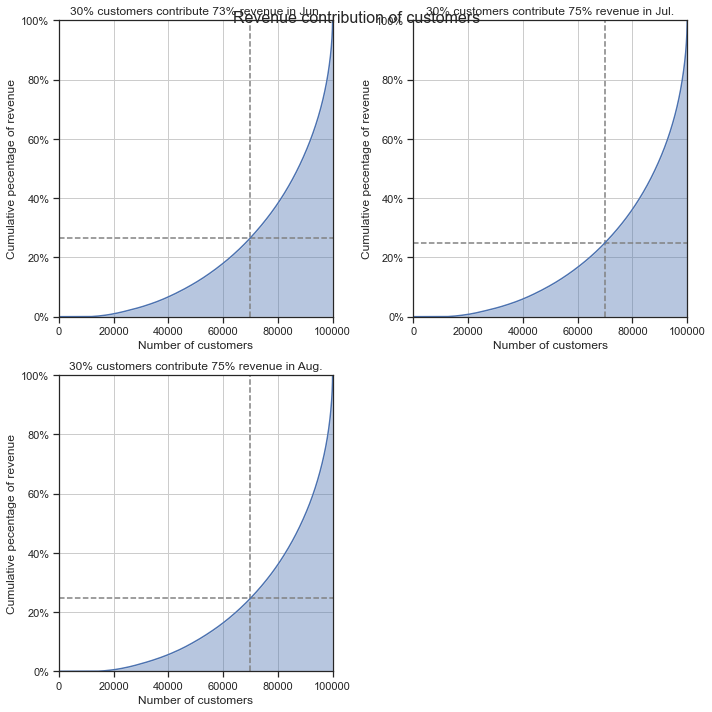

In [9]:
total_amt_cols = ['total_amt_6', 'total_amt_7', 'total_amt_8']
month_labels = ['Jun.', 'Jul.', 'Aug.']

fig = plt.figure(figsize=(10, 10), tight_layout=True)

for idx in range(len(total_amt_cols)):
    rev = telecom[total_amt_cols[idx]].sort_values().reset_index(drop=True)
    rev_pct = rev.cumsum()
    rev_pct /= rev_pct.iloc[-1]
    pct = rev_pct.quantile(0.7)
    
    ax = fig.add_subplot(2, 2, idx + 1)
    ax.plot(rev_pct)
    ax.fill_between(rev_pct.index, rev_pct.values, alpha=0.4)
    ax.vlines(x=70000, ymax=1, ymin=0, colors="gray", linestyles="--")
    ax.hlines(y=pct, xmax=100000, xmin=0, colors="gray", linestyles="--")

    ax.set_title('30% customers contribute {:.0%} revenue in {}'.format(1 - pct, month_labels[idx]))
    ax.set_ylabel('Cumulative pecentage of revenue')
    ax.set_xlabel('Number of customers')
    ax.set_ylim(0, 1)
    ax.set_xlim(0, 100000)
    ax.yaxis.set_major_formatter(mtick.PercentFormatter(1.0))
    ax.grid()

fig.suptitle('Revenue contribution of customers', fontsize=16)

30% of customers contribute about 75% of the renvnue. Therefore, we should filter out these high-value customers and train our model based on them.

In [10]:
highvalue = telecom[(telecom['total_amt_6'] > telecom['total_amt_6'].quantile(0.7)) |
                    (telecom['total_amt_7'] > telecom['total_amt_7'].quantile(0.7)) |
                    (telecom['total_amt_8'] > telecom['total_amt_8'].quantile(0.7))].copy()
highvalue.shape

(46145, 232)

平均每月费用

In [11]:
# highvalue[total_amt_cols].mean().mean()

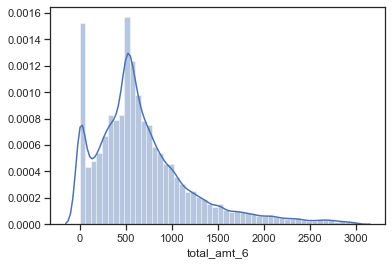

In [12]:
sns.distplot(highvalue.loc[highvalue['total_amt_6'] <= 3000, 'total_amt_6'])

AttributeError: module 'seaborn' has no attribute 'histplot'

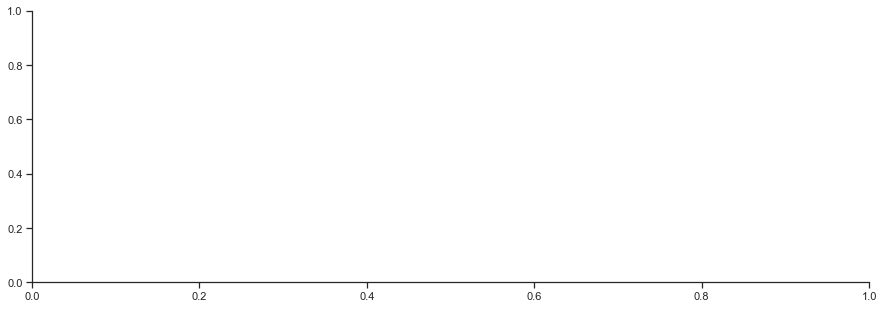

In [64]:
f, ax = plt.subplots(figsize=(15, 5))
sns.despine(f)

sns.histplot(
    highvalue,
    x="aon", hue="churn_flag",
    multiple="stack",
    palette="light:m_r",
    edgecolor=".3",
    linewidth=.5,
    log_scale=True,
)
ax.xaxis.set_major_formatter(mpl.ticker.ScalarFormatter())
ax.set_xticks([500, 1000, 2000, 5000, 10000])

In [ ]:
sns.distplot(highvalue['aon'] / 30)

In [ ]:
# (highvalue['aon']/30).mean()

In [ ]:
# (highvalue['aon']/30).median()

## Define Target Variable (Churn) <a class="anchor" id="define-churn"></a>

We have data from June to September.

**Definition of churn**: The churn customers don't have incoming and outgoing calls, and don't use the Internet data in September.

We have four features related to customers usage of calls and the Internet.
1. total_ic_mou_9: total incoming call time in minutes in September
2. total_og_mou_9: total outgoing call time in minutes in September
3. vol_2g_mb_9: total 2G data in MB in September
4. vol_3g_mb_9: total 3G data in MB in September

In [ ]:
highvalue[['total_ic_mou_9', 'total_og_mou_9', 'vol_2g_mb_9', 'vol_3g_mb_9']].head()

In [ ]:
highvalue['churn_flag'] = np.where(
    (highvalue['total_ic_mou_9'] == 0.00) & (highvalue['total_og_mou_9'] == 0.00)
    & (highvalue['vol_2g_mb_9'] == 0.00) & (highvalue['vol_3g_mb_9'] == 0.00),
    1, 0)
highvalue['churn_flag'].value_counts()

In [ ]:
churn_count = highvalue['churn_flag'].value_counts()
print('{} customers stayed (label 1) \n{} customers churned (label 0)'.format(churn_count.iloc[0], churn_count.iloc[1]))

The percentage of churn (label 1) and stayed (label 0) customers (Unbalanced dataset).

In [ ]:
highvalue['churn_flag'].value_counts() * 100/highvalue.shape[0]

filter out data in September because we only use data from pervious months to predict.

In [ ]:
highvalue = highvalue.drop(highvalue.filter(regex='_9|sep', axis = 1).columns, axis=1)
highvalue.shape

## Filter Out Useless Features: Single Unique Values & Mobile Number <a class="anchor" id="filter-single"></a>

In [ ]:
unique_stats = highvalue.nunique().to_frame().reset_index().rename(columns = {'index': 'feature', 0: 'nunique'})
unique_stats[unique_stats['nunique'] == 1]

In [ ]:
single_cols = unique_stats.loc[unique_stats['nunique'] == 1, 'feature']
highvalue.drop(columns=single_cols, inplace=True)
highvalue.shape

In [ ]:
highvalue.drop(columns=['mobile_number'], inplace=True)

## Missing Values <a class="anchor" id="missing-values"></a>

The missing value percentage for each feature

In [ ]:
round((highvalue.isna().sum()*100 / highvalue.shape[0]), 2).sort_values(ascending=False)

### Methodologies

There are two possibilities why this feature have missing values:
1. **Customers have no transaction**, so we need to assign 0 to this feature 
2. **Our data collection system fail to collect the data**, so we can use mean, median or EM algorithm to fill it

### 1. Missing because customers have no transaction

Let's look at `arpu_2g_6`, which has highest missing rate. This feature means average revenue per user for 2g network data usage in June.

Let's check what is the actual reason for missing.

Firstly, get the data-recharge-related columns

In [ ]:
rech_data_cols = ['date_of_last_rech_data', 'total_rech_data', 'max_rech_data', 
                  'count_rech_2g', 'count_rech_3g', 'av_rech_amt_data', 
                  'vol_2g_mb', 'vol_3g_mb', 'arpu_3g', 'arpu_2g', 
                  'night_pck_user', 'monthly_2g', 'sachet_2g', 'monthly_3g', 
                  'sachet_3g', 'fb_user']

rech_cols = ['total_rech_num', 'total_rech_amt', 'max_rech_amt',
             'date_of_last_rech', 'last_day_rech_amt', 'date_of_last_rech_data',
             'total_rech_data', 'max_rech_data', 'count_rech_2g',
             'count_rech_3g', 'av_rech_amt_data', 'vol_2g_mb', 'vol_3g_mb',
             'arpu_3g', 'arpu_2g', 'night_pck_user', 'monthly_2g',
             'sachet_2g', 'monthly_3g', 'sachet_3g', 'fb_user']

In [ ]:
highvalue[highvalue['arpu_2g_6'].isna()][list(map(lambda ele : ele + '_6', rech_data_cols))].nunique()

Observation 1: For sub-data where `arpu_2g_6` is NaN in the rows, the `arpu_2g_6` related columns only have 0 or 1 kind of values.

In [ ]:
highvalue[highvalue['arpu_2g_6'].isna()][list(map(lambda ele : ele + '_6', rech_data_cols))].head()

Observation 2: For sub-data where `arpu_2g_6` is NaN in the rows, the `arpu_2g_6` related columns have value NaN or 0.0

Conclusion from Observation 1 & 2:
For sub-data where `arpu_2g_6` is NaN in the rows, all `arpu_2g_6` related data have value NaN or 0, **which means customers don't have transaction records for data usage.**

So fill all these columns with value 0.

In [ ]:
fill_cols = ['fb_user_6', 'arpu_3g_6', 'max_rech_data_6', 'arpu_2g_6', 
             'total_rech_data_6', 'total_data_rech_amt_6', 'av_rech_amt_data_6', 
             'night_pck_user_6', 'count_rech_2g_6', 'date_of_last_rech_data_6',
             'count_rech_3g_6']
for col in fill_cols:
    highvalue[col].fillna(0, inplace=True)
highvalue[fill_cols].isna().sum()

Similarly, we can use this method to fill other columns with same missing reason (no transaction records)

In [ ]:
fill_cols = ['av_rech_amt_data_8', 'arpu_2g_8', 'date_of_last_rech_data_8',
             'total_data_rech_amt_8', 'total_rech_data_8', 'arpu_3g_8',
             'max_rech_data_8', 'night_pck_user_8', 'count_rech_2g_8', 
             'count_rech_3g_8', 'fb_user_8']
for col in fill_cols:
    highvalue[col].fillna(0, inplace=True)

In [ ]:
fill_cols = ['total_rech_data_7', 'max_rech_data_7', 'date_of_last_rech_data_7', 
             'night_pck_user_7', 'fb_user_7', 'count_rech_3g_7', 'arpu_2g_7', 
             'total_data_rech_amt_7', 'av_rech_amt_data_7', 'arpu_3g_7',
             'count_rech_2g_7']
for col in fill_cols:
    highvalue[col].fillna(0, inplace=True)

In [ ]:
fill_cols = ['loc_og_mou_8', 'std_ic_t2t_mou_8', 'loc_og_t2f_mou_8', 
             'isd_ic_mou_8', 'loc_og_t2c_mou_8', 'std_og_t2t_mou_8',
             'ic_others_8', 'std_og_t2m_mou_8', 'std_og_t2f_mou_8',
             'std_og_mou_8', 'loc_og_t2t_mou_8', 'std_ic_t2f_mou_8',
             'isd_og_mou_8', 'spl_og_mou_8', 'loc_ic_mou_8', 'og_others_8',
             'loc_ic_t2f_mou_8', 'loc_ic_t2t_mou_8', 'loc_og_t2m_mou_8',
             'loc_ic_t2m_mou_8', 'offnet_mou_8', 'spl_ic_mou_8',
             'roam_og_mou_8', 'std_ic_t2m_mou_8', 'onnet_mou_8',
             'std_ic_mou_8', 'roam_ic_mou_8']
for col in fill_cols:
    highvalue[col].fillna(0, inplace=True)

In [ ]:
fill_cols = ['std_ic_mou_7', 'loc_og_t2t_mou_7', 'std_og_t2f_mou_7', 
             'isd_og_mou_7', 'std_og_t2m_mou_7', 'spl_og_mou_7',
             'std_og_t2t_mou_7', 'og_others_7', 'loc_og_mou_7',
             'loc_ic_t2t_mou_7', 'loc_og_t2c_mou_7', 'loc_ic_t2m_mou_7',
             'loc_og_t2f_mou_7', 'loc_ic_t2f_mou_7', 'loc_og_t2m_mou_7',
             'loc_ic_mou_7', 'std_og_mou_7', 'onnet_mou_7', 
             'roam_og_mou_7', 'std_ic_t2m_mou_7', 'spl_ic_mou_7', 
             'roam_ic_mou_7', 'ic_others_7', 'std_ic_t2f_mou_7', 
             'offnet_mou_7', 'std_ic_t2t_mou_7', 'isd_ic_mou_7']
for col in fill_cols:
    highvalue[col].fillna(0, inplace=True)

In [ ]:
fill_cols = ['std_ic_t2t_mou_6', 'std_ic_mou_6', 'isd_og_mou_6', 
             'spl_og_mou_6', 'isd_ic_mou_6', 'loc_ic_t2t_mou_6',
             'og_others_6', 'std_ic_t2f_mou_6', 'ic_others_6',
             'loc_ic_t2m_mou_6', 'loc_ic_t2f_mou_6', 'std_ic_t2m_mou_6',
             'std_og_mou_6', 'loc_ic_mou_6', 'spl_ic_mou_6',
             'roam_ic_mou_6', 'onnet_mou_6', 'loc_og_t2t_mou_6', 
             'loc_og_t2f_mou_6', 'roam_og_mou_6', 'loc_og_t2c_mou_6', 
             'loc_og_mou_6', 'offnet_mou_6', 'loc_og_t2m_mou_6', 
             'std_og_t2t_mou_6', 'std_og_t2f_mou_6', 'std_og_t2m_mou_6']
for col in fill_cols:
    highvalue[col].fillna(0, inplace=True)

In [ ]:
highvalue['date_of_last_rech_7'].fillna(0, inplace=True)

In [ ]:
highvalue['date_of_last_rech_6'].fillna(0, inplace=True)

### 2. Missing because data collection system fail to collect the data

This situation happened in `rech_8_cols`

In [ ]:
rech_8_cols = highvalue.filter(regex='rech.*_8').columns

In [ ]:
highvalue[highvalue['date_of_last_rech_8'].isna()][rech_8_cols].nunique()

Because `date_of_last_rech_data_8` has 2 different values, let's check how the data looks like when `date_of_last_rech_data_8` is not 0.

In [14]:
non_zero_row = highvalue.loc[highvalue['date_of_last_rech_8'].isna() & 
                             (highvalue['date_of_last_rech_data_8'] != 0), 
                             rech_8_cols]
non_zero_row

NameError: name 'rech_8_cols' is not defined

As we can seen above, there is only one row where `date_of_last_rech_data_8` is not 0.

We have over 30,000 rows of data thus we can simply drop this row.

In [15]:
highvalue.drop(non_zero_row.index, inplace=True)

NameError: name 'non_zero_row' is not defined

In [16]:
zero_row = highvalue.loc[highvalue['date_of_last_rech_8'].isna() & 
                         (highvalue['date_of_last_rech_data_8'] == 0), 
                         rech_8_cols]
zero_row.nunique()

NameError: name 'rech_8_cols' is not defined

fill other `date_of_last_rech_8` as 0

In [17]:
highvalue['date_of_last_rech_8'].fillna(0, inplace=True)
highvalue['date_of_last_rech_8'].isna().sum()

0

### check whether we still have any missing values

In [18]:
highvalue.isna().values.any()

True

## Derived Features <a class="anchor" id="derive-features"></a>

### 1. Date features

Change date columns to `datetime` type

In [19]:
date_cols = highvalue.filter(regex='date').columns
for col in date_cols:
    highvalue[col] = pd.to_datetime(highvalue[col])
highvalue[date_cols].info(verbose=True, null_counts=True) 

<class 'pandas.core.frame.DataFrame'>
Int64Index: 46145 entries, 0 to 99998
Data columns (total 12 columns):
 #   Column                    Non-Null Count  Dtype         
---  ------                    --------------  -----         
 0   last_date_of_month_6      46145 non-null  datetime64[ns]
 1   last_date_of_month_7      46046 non-null  datetime64[ns]
 2   last_date_of_month_8      45832 non-null  datetime64[ns]
 3   last_date_of_month_9      45566 non-null  datetime64[ns]
 4   date_of_last_rech_6       45704 non-null  datetime64[ns]
 5   date_of_last_rech_7       45694 non-null  datetime64[ns]
 6   date_of_last_rech_8       46145 non-null  datetime64[ns]
 7   date_of_last_rech_9       44541 non-null  datetime64[ns]
 8   date_of_last_rech_data_6  20674 non-null  datetime64[ns]
 9   date_of_last_rech_data_7  21289 non-null  datetime64[ns]
 10  date_of_last_rech_data_8  21967 non-null  datetime64[ns]
 11  date_of_last_rech_data_9  20362 non-null  datetime64[ns]
dtypes: datetime64[ns](

Derive 2 features from date:
1. `dayofweek` of the date, e.g. monday, tuesday
2. `partofmonth` of the date, e.g. early (of the month), middle, late

In [20]:
def na_category(row, original_col, c_num, func):
    # if date equal to 1970-01-01, which means date is nan
    # then our customers didn't take any actions
    if row[original_col] == dt.datetime(1970, 1, 1):
        return c_num
    # otherwise, the action took at this time
    return func(row[original_col])

In [21]:
for col in date_cols:
    highvalue['dayofweek_' + col] = highvalue.apply(
        na_category, 
        axis=1, 
        args=(col, 7, lambda x : x.dayofweek,))
    highvalue['dayofweek_' + col] = highvalue['dayofweek_' + col].map({0: 'monday',
                                                                       1: 'tuesday',
                                                                       2: 'wednesday',
                                                                       3: 'thursday',
                                                                       4: 'friday',
                                                                       5: 'saturday',
                                                                       6: 'sunday',
                                                                       7: 'no_rech'})
    highvalue['partofmonth_' + col] = highvalue.apply(
        na_category,
        axis=1,
        args=(col, 3, lambda x : min(int((x.day - 1) / 10), 2),))
    highvalue['partofmonth_' + col] = highvalue['partofmonth_' + col].map({0: 'early',
                                                                           1: 'middle',
                                                                           2: 'late',
                                                                           3: 'no_rech'})

ValueError: cannot convert float NaN to integer

In [ ]:
highvalue.filter(regex='(dayofweek|partofmonth)').head()

one-hot encoding dummy variable

In [ ]:
highvalue = pd.get_dummies(highvalue, columns=list(map(lambda x : 'dayofweek_' + x, date_cols)))
highvalue = pd.get_dummies(highvalue, columns=list(map(lambda x : 'partofmonth_' + x, date_cols)))

In [ ]:
highvalue.filter(regex='(dayofweek|partofmonth)').head()

drop original date cols

In [ ]:
highvalue.drop(date_cols, axis=1, inplace=True)

### 2. Month-to-month change features

These features are calculated by the data from the last month and the current month. Basically, it's xxx_lastmonth / xxx_thismonth. 

Take `arpu` (Average Revenue Per User) for example:

$$
arpu\_7over6 = \frac{arpu\_7}{arpu\_6}
$$

However, **we may have denominator as 0 or negative values**. So we slightly change the formula:

$$
arpu\_7over6 = \frac{arpu\_7 + (-1)^{1\{arpu\_7 < 0\}}}{arpu\_6 + (-1)^{1\{arpu\_6 < 0\}}}
$$

Note that $1\{arpu\_7 < 0\}$ equals 1 if `arpu_7` < 0 otherwise it equals 0.

Now, to define a python function for this formula

In [ ]:
def gen_over_cols(cols):
    for col in set(map(lambda x : x[:-2], cols)):
        adjust_6 = highvalue[col + '_6'].apply(lambda x : x + (1 if x >= 0 else -1))
        adjust_7 = highvalue[col + '_7'].apply(lambda x : x + (1 if x >= 0 else -1))
        adjust_8 = highvalue[col + '_8'].apply(lambda x : x + (1 if x >= 0 else -1))
        
        highvalue[col + '_7over6'] = (adjust_7 / adjust_6)
        highvalue[col + '_8over7'] = (adjust_8 / adjust_7)

Now let's derive month-to-month change data for usage and recharge columns

In [ ]:
mou_cols = highvalue.filter(regex='mou').columns
mou_cols

In [ ]:
gen_over_cols(mou_cols)

highvalue[highvalue.filter(regex='mou.*(7over6|8over7)').columns].head()

In [ ]:
other_cols = highvalue.filter(regex='other').columns
other_cols

In [ ]:
gen_over_cols(other_cols)

highvalue[highvalue.filter(regex='other.*(7over6|8over7)').columns].head()

In [ ]:
data_cols = highvalue.filter(regex='(2g|3g)').columns
data_cols

In [ ]:
gen_over_cols(data_cols)

highvalue[highvalue.filter(regex='(2g|3g).*(7over6|8over7)').columns].head()

In [ ]:
arpu_cols = highvalue.filter(regex='arpu_(?!(2g|3g))').columns
arpu_cols

In [ ]:
gen_over_cols(arpu_cols)

highvalue[highvalue.filter(regex='arpu.*(7over6|8over7)').columns].head()

In [ ]:
highvalue.shape

## Filter Out Highly Related Features <a class="anchor" id="filter-related"></a>

In [ ]:
abs_corr_matrix = highvalue.corr().abs()
abs_corr_matrix = abs_corr_matrix.where(np.triu(np.ones(abs_corr_matrix.shape), k=1).astype(bool))
high_corr_indices = np.asarray(abs_corr_matrix > 0.8).nonzero()
correlated_pairs = [(abs_corr_matrix.index[x], abs_corr_matrix.columns[y]) 
                     for x, y in zip(*high_corr_indices)]
correlated_pairs

In [ ]:
print("# Correlated pairs (where corr > 0.8): ", len(correlated_pairs))

In [ ]:
to_drop = [column for column in abs_corr_matrix.columns if any(abs_corr_matrix[column] > 0.80)]
highvalue.drop(columns=to_drop, axis=1, inplace=True)
highvalue.shape

## Prepare Train and Test Data <a class="anchor" id="train-test"></a>

### Split Train and Test Data <a class="anchor" id="split"></a>

In [ ]:
from sklearn.model_selection import train_test_split

np.random.seed(rdn_seed)
train, test = train_test_split(highvalue, train_size = 0.8, random_state=rdn_seed)

In [ ]:
train.shape, test.shape

In [ ]:
X_train=train.drop('churn_flag',axis=1)
X_test=test.drop('churn_flag',axis=1)
y_train=train['churn_flag']
y_test=test['churn_flag']

In [ ]:
X_train.head()

### Feature Elimination <a class="anchor" id="feature-elimination"></a>

Let's consider 2 kinds of feature elimination methods:

1. Recursive feature elimination (RFE, One of the wrapper methods)
2. Principle Component Analysis (PCA)

**Because it's hard to interpret new features derived by PCA, for better explaination of business case, we choose RFE which keeps original features and is easilier to interpret.**

Let's run RFE. We should standardize our features first for fast learning.

In [ ]:
from sklearn.preprocessing import PowerTransformer
scaler = PowerTransformer()
X_train_rfe = X_train.copy()
X_train_rfe[:] = scaler.fit_transform(X_train_rfe)
X_train_rfe.head()

Use LogisticRegression to do RFE

In [ ]:
%%capture
from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression

lr = LogisticRegression(random_state=rdn_seed)

# choose top 90 features
rfe = RFE(lr, n_features_to_select=90)   
rfe = rfe.fit(X_train_rfe, y_train)

In [ ]:
# list(zip(X_train_rfe.columns, rfe.support_, rfe.ranking_))

In [ ]:
col = X_train_rfe.columns[rfe.support_]
col

Only use selected features

In [ ]:
X_train = X_train[col]
X_test =  X_test[col]

In [ ]:
X_test.shape

### Resample (SMOTENC) <a class="anchor" id="resample"></a>

Here we use Synthetic Minority Over-sampling Technique for Nominal and Continuous (SMOTE-NC) because it mitigates the problem of overfitting and compatible with categorical data.

In [ ]:
print("Before OverSampling, counts of label '1': {}".format(sum(y_train==1)))
print("Before OverSampling, counts of label '0': {}".format(sum(y_train==0)))

In [ ]:
from imblearn.over_sampling import SMOTENC

# find categorical columns
is_categorical = (X_train.nunique() == 2).ravel()

# run SMOTENC
smnc = SMOTENC(random_state=42, categorical_features=is_categorical)
X_train_res, y_train_res = smnc.fit_sample(X_train, y_train.ravel())

print('After OverSampling, the shape of train_X: {}'.format(X_train_res.shape))

In [ ]:
print("After OverSampling, counts of label '1': {}".format(sum(y_train_res==1)))
print("After OverSampling, counts of label '0': {}".format(sum(y_train_res==0)))

In [ ]:
X_train_res.head()

### Scale <a class="anchor" id="scale"></a>

Use PowerTransformer to standardize data for fast learning

In [ ]:
from sklearn.preprocessing import PowerTransformer
scaler = PowerTransformer()
X_train_res[:] = scaler.fit_transform(X_train_res)
X_train_res.head()

In [ ]:
# from sklearn.preprocessing import StandardScaler
# scaler = StandardScaler()
# X_train_res[:] = scaler.fit_transform(X_train_res)
# X_train_res.head()

In [ ]:
X_test[:] = scaler.transform(X_test[:])
X_test.head()

In [ ]:
# X_train[:] = scaler.transform(X_train[:])
# X_train.head()

# Model Training Method Overview

# Logistic Regression <a class="anchor" id="logistic-regression"></a>

<img src="./pic/test_method.png" alt = "test pic" style = "width:500px;">

对训练集再进行一次划分，分为训练集和验证集，这样划分的结果就是：原始数据划分为3份，分别为：训练集，验证集和测试集；其中训练集用来模型训练，验证集用来调整参数，而测试集用来衡量模型表现好坏。

https://www.cnblogs.com/wj-1314/p/10422159.html

https://mlcourse.ai/articles/topic4-part3-regularization/

https://zhuanlan.zhihu.com/p/35182003

Define my own scoring matrix: https://scikit-learn.org/stable/modules/model_evaluation.html#scoring

Todo: class weight tuning

In [ ]:
from sklearn.metrics import make_scorer

TP_BENEFIT = 3337.76
TN_BENEFIT = 0
FP_COST = -1564.58
FN_COST = 0

def profit_score(y_true, y_pred):
    p_p = (y_true == 1).sum() / len(y_true)
    p_n = 1 - p_p
    tp = ((y_true == 1) & (y_true == y_pred)).sum()
    fn = ((y_true == 1) & (y_true != y_pred)).sum()
    tn = ((y_true == 0) & (y_true == y_pred)).sum()
    fp = ((y_true == 0) & (y_true != y_pred)).sum()
    tpr = tp / (tp + fn)
    fnr = fn / (tp + fn)
    tnr = tn / (tn + fp)
    fpr = fp / (tn + fp)
    score = (p_p * (tpr * TP_BENEFIT + fnr * FN_COST) +
             p_n * (tnr * TN_BENEFIT + fpr * FP_COST))
    return score

In [ ]:
double_scoring = {'Profit': make_scorer(profit_score), 'AUC': 'roc_auc'}

In [ ]:
# profit_score(lr_cv.predict(X_test), y_test)

In [ ]:
lg_params = {
    'C': list(np.power(10.0, np.arange(-10, 10)))
}

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV

lr_grid_search = GridSearchCV(
    LogisticRegression(penalty='l2', random_state=rdn_seed),
    param_grid=lg_params,
    scoring=double_scoring,
    refit='Profit',
    return_train_score=True,
    cv=4,
    n_jobs=-1,
    verbose=1,
)

In [ ]:
%%time
lr_grid_search.fit(X_train_res, y_train_res)

In [ ]:
# lr_grid_search.cv_results_

In [ ]:
def grid_search_performance(results, param_col, ylim_0, ylim_1, xscale='linear'):
    fig, axes = plt.subplots(len(double_scoring.keys()), 1, figsize=(8, 8), tight_layout=True)

    # results = lr_grid_search.cv_results_
    X_axis = np.array(results[param_col].data, dtype=float)
    idx = 0

    axes[0].set_ylim(ylim_0)
    axes[1].set_ylim(ylim_1)

    for scorer, color in zip(double_scoring.keys(), ['b', 'k']):
        for sample, style in (('train', '--'), ('test', '-')):
            sample_score_mean = results['mean_%s_%s' % (sample, scorer)]
            sample_score_std = results['std_%s_%s' % (sample, scorer)]
            axes[idx].fill_between(
                X_axis, sample_score_mean - sample_score_std,
                sample_score_mean + sample_score_std,
                alpha=0.1 if sample == 'test' else 0, color=color,
            )
            axes[idx].plot(
                X_axis, sample_score_mean, style, color=color,
                alpha=1 if sample == 'test' else 0.7,
                label="%s (%s)" % (scorer, sample),
            )

        best_index = np.nonzero(results['rank_test_%s' % scorer] == 1)[0][0]
        best_score = results['mean_test_%s' % scorer][best_index]

        # Plot a dotted vertical line at the best score for that scorer marked by x
        axes[idx].plot(
            [X_axis[best_index], ] * 2, [0, best_score],
            linestyle='-.', color=color, marker='x', markeredgewidth=3, ms=8,
        )

        # Annotate the best score for that scorer
        ylim_list = list(axes[idx].get_ylim())
        move_scale = (ylim_list[1] - ylim_list[0]) / 20
        axes[idx].annotate(
            "%0.2f" % best_score, 
            (X_axis[best_index], best_score + move_scale),
        )

        axes[idx].set_title(scorer)
        axes[idx].set_xlabel(param_col)
        axes[idx].set_ylabel(scorer)
        axes[idx].legend(loc="best")
        axes[idx].grid(False)
        axes[idx].set_xscale(xscale)

        idx += 1

    fig.suptitle('GridSearchCV evaluating using multiple scorers', fontsize=16)
    

grid_search_performance(lr_grid_search.cv_results_, 'param_C', 
                        ylim_0=(1200, 1600),
                        ylim_1=(0.9),
                        xscale='log')

In [ ]:
lr_grid_search.best_params_, lr_grid_search.best_score_

In [ ]:
from sklearn.metrics import classification_report

preds = lr_grid_search.predict(X_test)
print(classification_report(y_test, preds))

In [ ]:
from sklearn import metrics

preds_probs = lr_grid_search.predict_proba(X_test)[:, 1]
fpr, tpr, _ = metrics.roc_curve(y_test, preds_probs)
roc_auc = metrics.auc(fpr, tpr)
print("ROC for the test dataset",'{:.1%}'.format(roc_auc))

fig, ax = plt.subplots(figsize=(6, 6))

ax.plot(fpr, tpr, label='ROC curve (area = %0.2f)' % roc_auc)
# ax.fill_between(fpr, tpr, alpha=0.4)
ax.plot([0, 1], [0, 1], color='gray', linestyle='--')

ax.set_xlim(0.0, 1.0)
ax.set_ylim(0.0, 1.05)
ax.grid()
ax.set_xlabel('False Positive Rate')
ax.set_ylabel('True Positive Rate')
ax.set_title('Receiver operating characteristic for logistic regression')
ax.legend(loc="lower right")

In [ ]:
from sklearn.metrics import plot_confusion_matrix

disp = plot_confusion_matrix(lr_grid_search, X_test, y_test,
                             display_labels=['Not Churn', 'Churn'])
disp.ax_.set_title('Confusion matrix for logistic regression')

https://scikit-learn.org/stable/auto_examples/model_selection/plot_multi_metric_evaluation.html#sphx-glr-auto-examples-model-selection-plot-multi-metric-evaluation-py   画一个不同 threshold 下的 profit 的图

In [22]:
profit_score(y_test, preds)

NameError: name 'profit_score' is not defined

## SVM

In [23]:
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVC

In [24]:
svm_params1 = {
    'C': list(np.power(10.0, np.arange(-1, 3))),
#     'gamma': list(np.power(10.0, np.arange(-6, 2))),
}

In [25]:
%%time
svm_grid_search1 = GridSearchCV(
    SVC(kernel='rbf'),
    param_grid=svm_params1, 
    scoring=double_scoring,
    refit='Profit',
    return_train_score=True,
    cv=4,
    n_jobs=-1, 
    verbose=1
)
svm_grid_search1.fit(X_train_res, y_train_res)

NameError: name 'double_scoring' is not defined

In [26]:
# svm_grid_search1.cv_results_

In [27]:
grid_search_performance(
    svm_grid_search1.cv_results_, 'param_C',
    xscale='log',
    ylim_0=(1300, 1700),
    ylim_1=(0.96, 1.005),
)

NameError: name 'grid_search_performance' is not defined

In [28]:
svm_best_params1 = svm_grid_search1.best_params_
svm_grid_search1.best_params_, svm_grid_search1.best_score_

NameError: name 'svm_grid_search1' is not defined

In [29]:
svm_params2 = {
    'gamma': list(np.power(10.0, np.arange(-2, 1))),
}

In [30]:
%%time
svm_grid_search2 = GridSearchCV(
    SVC(kernel='rbf'),
    param_grid=svm_params2, 
    scoring=double_scoring,
    refit='Profit',
    return_train_score=True,
    cv=4,
    n_jobs=-1, 
    verbose=1
)
svm_grid_search2.fit(X_train_res, y_train_res)

NameError: name 'double_scoring' is not defined

In [31]:
# svm_grid_search2.cv_results_

In [32]:
grid_search_performance(
    svm_grid_search2.cv_results_, 'param_C',
    xscale='log',
    ylim_0=(1300, 1700),
    ylim_1=(0.96, 1.005),
)

NameError: name 'grid_search_performance' is not defined

In [33]:
svm_best_params2 = svm_grid_search2.best_params_
svm_grid_search2.best_params_, svm_grid_search2.best_score_

NameError: name 'svm_grid_search2' is not defined

In [34]:
%%time
from sklearn.svm import SVC
svm_rbf = SVC(**svm_best_params1, kernel='rbf', probability=True)
svm_rbf.fit(X_train_res, y_train_res)

NameError: name 'svm_best_params1' is not defined

In [35]:
from sklearn.metrics import classification_report

preds = svm_rbf.predict(X_test)
print(classification_report(y_test, preds))

NameError: name 'svm_rbf' is not defined

In [36]:
preds_probs = svm_rbf.predict_proba(X_test)[:, 1]
fpr, tpr, _ = metrics.roc_curve(y_test, preds_probs)
roc_auc = metrics.auc(fpr, tpr)
print("ROC for the test dataset",'{:.1%}'.format(roc_auc))

fig, ax = plt.subplots(figsize=(6, 6))

ax.plot(fpr, tpr, label='ROC curve (area = %0.2f)' % roc_auc)
# ax.fill_between(fpr, tpr, alpha=0.4)
ax.plot([0, 1], [0, 1], color='gray', linestyle='--')

ax.set_xlim(0.0, 1.0)
ax.set_ylim(0.0, 1.05)
ax.grid()
ax.set_xlabel('False Positive Rate')
ax.set_ylabel('True Positive Rate')
ax.set_title('Receiver operating characteristic for logistic regression')
ax.legend(loc="lower right")

NameError: name 'svm_rbf' is not defined

In [37]:
from sklearn.metrics import plot_confusion_matrix

disp = plot_confusion_matrix(svm_rbf, X_test, y_test,
                             display_labels=['Not Churn', 'Churn'])
disp.ax_.set_title('Confusion matrix for logistic regression')

NameError: name 'svm_rbf' is not defined

In [38]:
profit_score(y_test, preds)

NameError: name 'profit_score' is not defined

In [39]:
profit_score(y_test, preds)

NameError: name 'profit_score' is not defined

## Random Forest

https://www.cnblogs.com/pinard/p/6160412.html

In [40]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier

In [41]:
rf_params1 = {
    'n_estimators': range(10, 101, 10),
}

In [42]:
%%time
rf_grid_search1 = GridSearchCV(
    estimator=RandomForestClassifier(random_state=rdn_seed), 
    param_grid=rf_params1, 
    scoring=double_scoring,
    refit='Profit',
    return_train_score=True,
    cv=4,
    n_jobs=-1,
    verbose=1,
)
rf_grid_search1.fit(X_train_res, y_train_res)

NameError: name 'double_scoring' is not defined

In [43]:
# rf_grid_search1.cv_results_

In [44]:
grid_search_performance(
    rf_grid_search1.cv_results_, 'param_n_estimators',
    ylim_0=(1300, 1700),
    ylim_1=(0.96, 1.005),
)

NameError: name 'grid_search_performance' is not defined

In [45]:
rf_best_params1 = rf_grid_search1.best_params_
rf_grid_search1.best_params_, rf_grid_search1.best_score_

NameError: name 'rf_grid_search1' is not defined

In [46]:
rf_params2 = {
    'max_depth': range(10,61,10),
}

In [47]:
%%time
rf_grid_search2 = GridSearchCV(
    estimator=RandomForestClassifier(**rf_best_params1, random_state=rdn_seed), 
    param_grid=rf_params2, 
    scoring=double_scoring,
    refit='Profit',
    return_train_score=True,
    cv=4,
    n_jobs=-1, 
    verbose=1,)
rf_grid_search2.fit(X_train_res, y_train_res)

NameError: name 'rf_best_params1' is not defined

In [48]:
# rf_grid_search2.cv_results_

In [49]:
grid_search_performance(rf_grid_search2.cv_results_, 'param_max_depth',
                        ylim_0=(1300, 1700),
                        ylim_1=(0.96, 1.005))

NameError: name 'grid_search_performance' is not defined

In [50]:
rf_best_params2 = rf_grid_search2.best_params_
rf_grid_search2.best_params_, rf_grid_search2.best_score_

NameError: name 'rf_grid_search2' is not defined

In [51]:
rf_params3 = {
    'max_features': range(1, 20, 2),
}

In [52]:
%%time
rf_grid_search3 = GridSearchCV(
    estimator=RandomForestClassifier(
        **rf_best_params1, 
        **rf_best_params2, 
        random_state=rdn_seed,
    ),
    param_grid=rf_params3, 
    scoring=double_scoring,
    refit='Profit',
    return_train_score=True,
    cv=4,
    n_jobs=-1, 
    verbose=1,
)
rf_grid_search3.fit(X_train_res, y_train_res)

NameError: name 'rf_best_params1' is not defined

In [53]:
# rf_grid_search3.cv_results_

In [54]:
grid_search_performance(rf_grid_search3.cv_results_, 'param_max_features',
                        ylim_0=(1300, 1700),
                        ylim_1=(0.96, 1.005))

NameError: name 'grid_search_performance' is not defined

In [55]:
rf_best_params3 = rf_grid_search3.best_params_
rf_grid_search3.best_params_, rf_grid_search3.best_score_

NameError: name 'rf_grid_search3' is not defined

In [56]:
rf_final = RandomForestClassifier(
    **rf_best_params1, 
    **rf_best_params2, 
    **rf_best_params3, 
    random_state=rdn_seed,
)
rf_final.fit(X_train_res, y_train_res)

NameError: name 'rf_best_params1' is not defined

In [57]:
rf_final = RandomForestClassifier(**rf_best_params1, **rf_best_params2, **rf_best_params3, random_state=rdn_seed)
rf_final.fit(X_train_res, y_train_res)

NameError: name 'rf_best_params1' is not defined

In [58]:
from sklearn.metrics import classification_report

preds = rf_final.predict(X_test)
print(classification_report(y_test, preds))

NameError: name 'rf_final' is not defined

In [59]:
preds_probs = rf_final.predict_proba(X_test)[:, 1]
fpr, tpr, _ = metrics.roc_curve(y_test, preds_probs)
roc_auc = metrics.auc(fpr, tpr)
print("ROC for the test dataset",'{:.1%}'.format(roc_auc))

fig, ax = plt.subplots(figsize=(6, 6))

ax.plot(fpr, tpr, label='ROC curve (area = %0.2f)' % roc_auc)
# ax.fill_between(fpr, tpr, alpha=0.4)
ax.plot([0, 1], [0, 1], color='gray', linestyle='--')

ax.set_xlim(0.0, 1.0)
ax.set_ylim(0.0, 1.05)
ax.grid()
ax.set_xlabel('False Positive Rate')
ax.set_ylabel('True Positive Rate')
ax.set_title('Receiver operating characteristic for logistic regression')
ax.legend(loc="lower right")

NameError: name 'rf_final' is not defined

In [60]:
from sklearn.metrics import plot_confusion_matrix

disp = plot_confusion_matrix(rf_final, X_test, y_test,
                             display_labels=['Not Churn', 'Churn'])
disp.ax_.set_title('Confusion matrix for logistic regression')

NameError: name 'rf_final' is not defined

In [61]:
profit_score(y_test, preds)

NameError: name 'profit_score' is not defined

In [62]:
importances = rf_final.feature_importances_
col_names =  X_train_res.columns

sorted_feature_importance = pd.DataFrame(sorted(zip(importances, list(col_names)), reverse=True),columns={'colName','value'})
sorted_feature_importance

NameError: name 'rf_final' is not defined

In [63]:
plt.figure(figsize = (20,5))
sns.barplot(y='colName', x='value',data=sorted_feature_importance[0:20])
plt.ylabel('Feature Importance Score')
plt.xlabel('Feature Name')
plt.xticks(rotation = 90)
plt.title('Random Forest Feature Importances')
plt.show()

NameError: name 'sorted_feature_importance' is not defined

<Figure size 1440x360 with 0 Axes>